In [40]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [145]:
COLORS = ['r', 'b', 'g','c','m','y','k','orange']

In [181]:
CLUSTER_DATA = np.loadtxt("cluster.dat").T

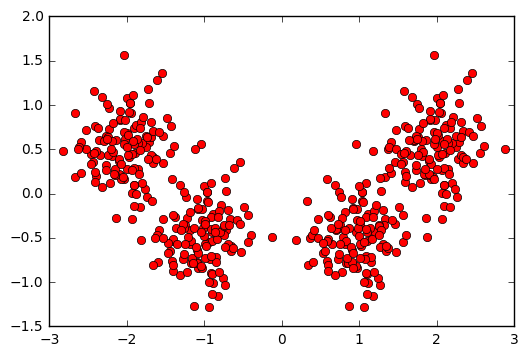

In [182]:
plt.plot(CLUSTER_DATA[:, 0], CLUSTER_DATA[:,1], 'ro')

# 1. K-Means

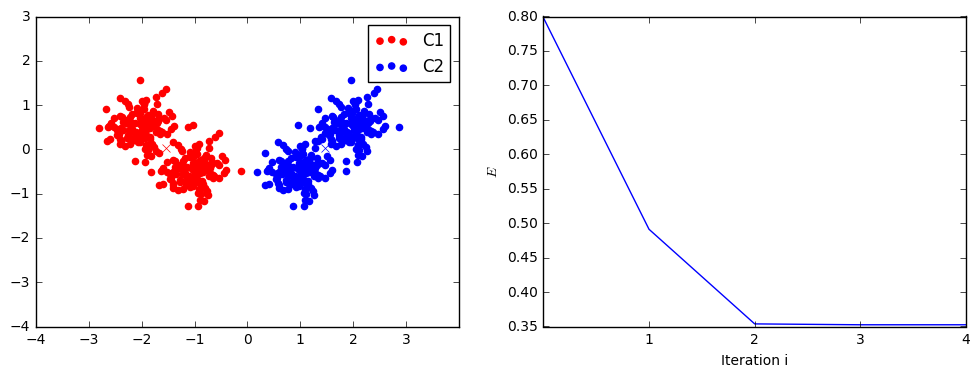

In [183]:
def kmean(k=2, t_max = 2):
    cost = []
    means = np.mean(CLUSTER_DATA, axis=0)
    centroids = np.random.multivariate_normal(means, np.eye(2),k) # k x 2
    for t in range(t_max):
        points_in_centroid = [ list() for i in range(k) ]
        for i in range(CLUSTER_DATA.shape[0]):
            p = CLUSTER_DATA[i,:]
            distance = np.sum(np.power(centroids - p, 2), axis=1)
            closest_centroid = np.argmin(distance)
            points_in_centroid[closest_centroid].append(i)
     

        new_centroids = list(map( lambda c: np.mean( CLUSTER_DATA[c,:], axis=0), points_in_centroid ))
        new_centroids = np.array(new_centroids)
        
        cluster_cost = [0]*k
        for c in range(k):
            points = points_in_centroid[c]
            if len(points) == 0:
                new_centroids[c,:] = centroids[c,:]
            else:
                cluster_cost[c] =  np.sum(np.sum(np.power(CLUSTER_DATA[points] - new_centroids[c,:],2), axis=1))
        
        centroids = new_centroids
        cost.append(np.sum(cluster_cost)/(2.0*CLUSTER_DATA.shape[0]))
      
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    for c in range(len(points_in_centroid)):
        points = points_in_centroid[c]
        plt.plot(centroids[c,0], centroids[c,1], marker='x', color = COLORS[c])

        plt.scatter(CLUSTER_DATA[points,0], CLUSTER_DATA[points,1], marker='o', color= COLORS[c], label = 'C%d' % (c+1) )
    plt.legend()
    plt.xticks(range(-4,4,1))
    plt.yticks(range(-4,4,1))
    
    plt.subplot(1,2,2)
    plt.plot(cost)
    plt.xticks(range(1,t_max))
    plt.ylabel("$E$")
    plt.xlabel("Iteration i")
kmean(k=2, t_max=5)

/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


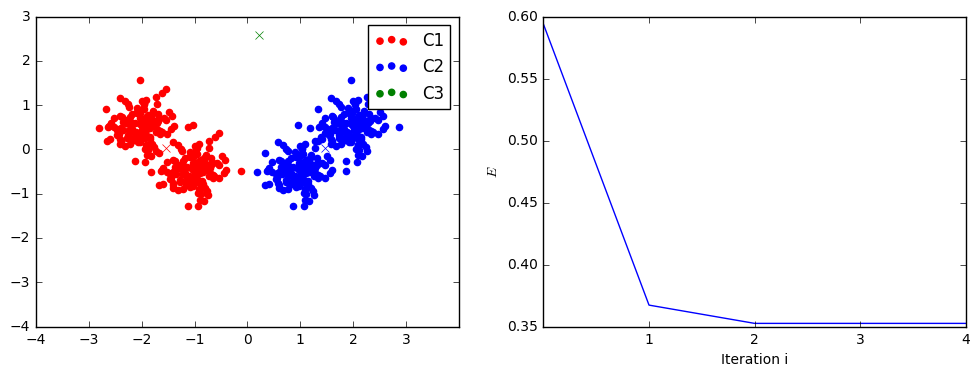

In [184]:
kmean(k=3, t_max=5)

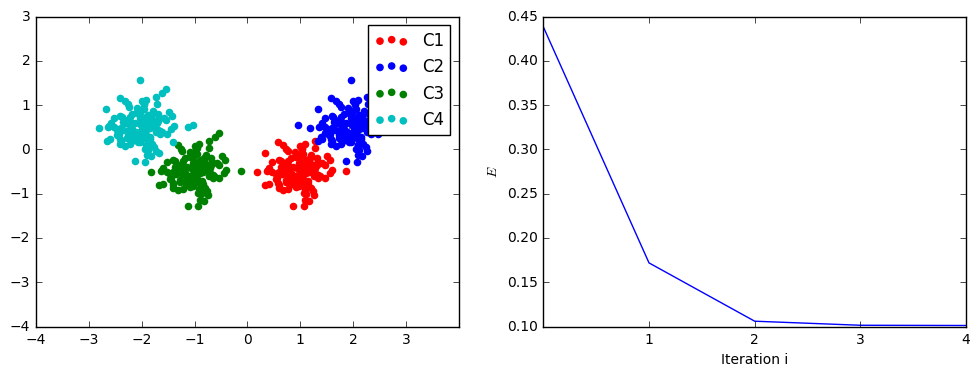

In [185]:
kmean(k=4, t_max=5)

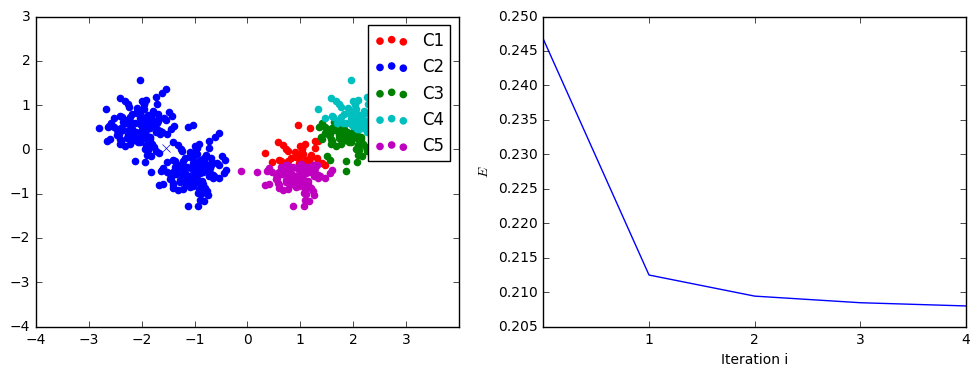

In [186]:
kmean(k=5, t_max=5)

/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


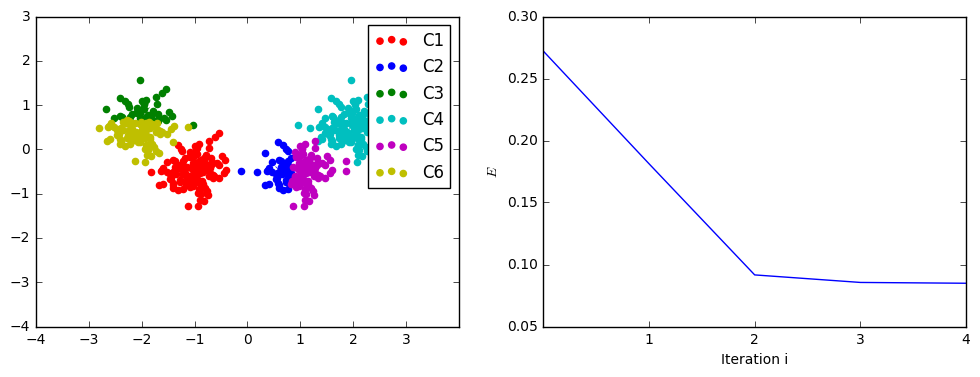

In [187]:
kmean(k=6, t_max=5)

/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


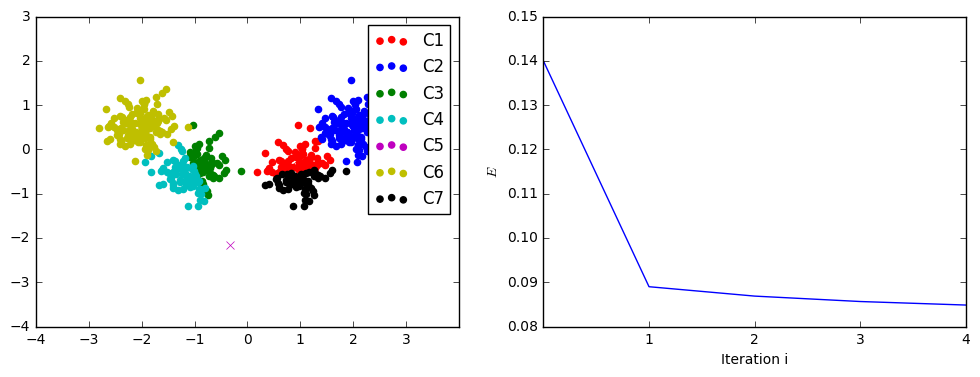

In [188]:
kmean(k=7, t_max=5)

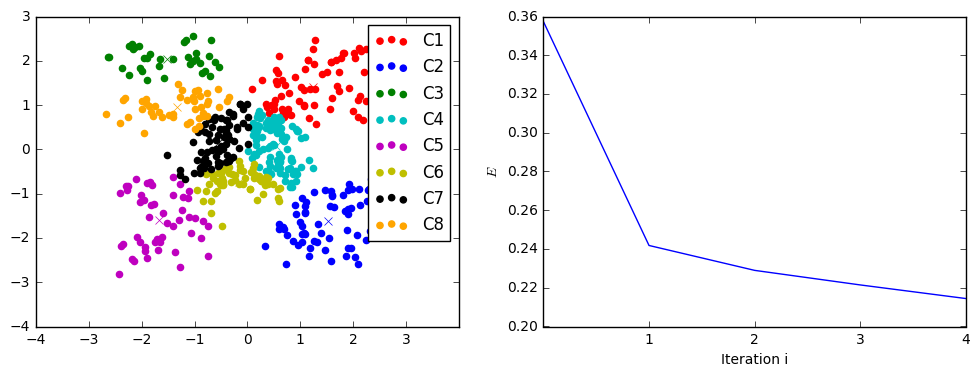

In [153]:
kmean(k=8, t_max=5)

# 2. Online K-Means

In [199]:
def plot_cluster_and_centroids(clusters, centroids):
    for c in range(len(clusters)):
        points = clusters[c]
        plt.plot(centroids[c,0], centroids[c,1], marker='x', color = COLORS[c])
        plt.scatter(CLUSTER_DATA[points,0], CLUSTER_DATA[points,1], marker='o', color= COLORS[c], label = 'C%d' % (c+1) )

/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


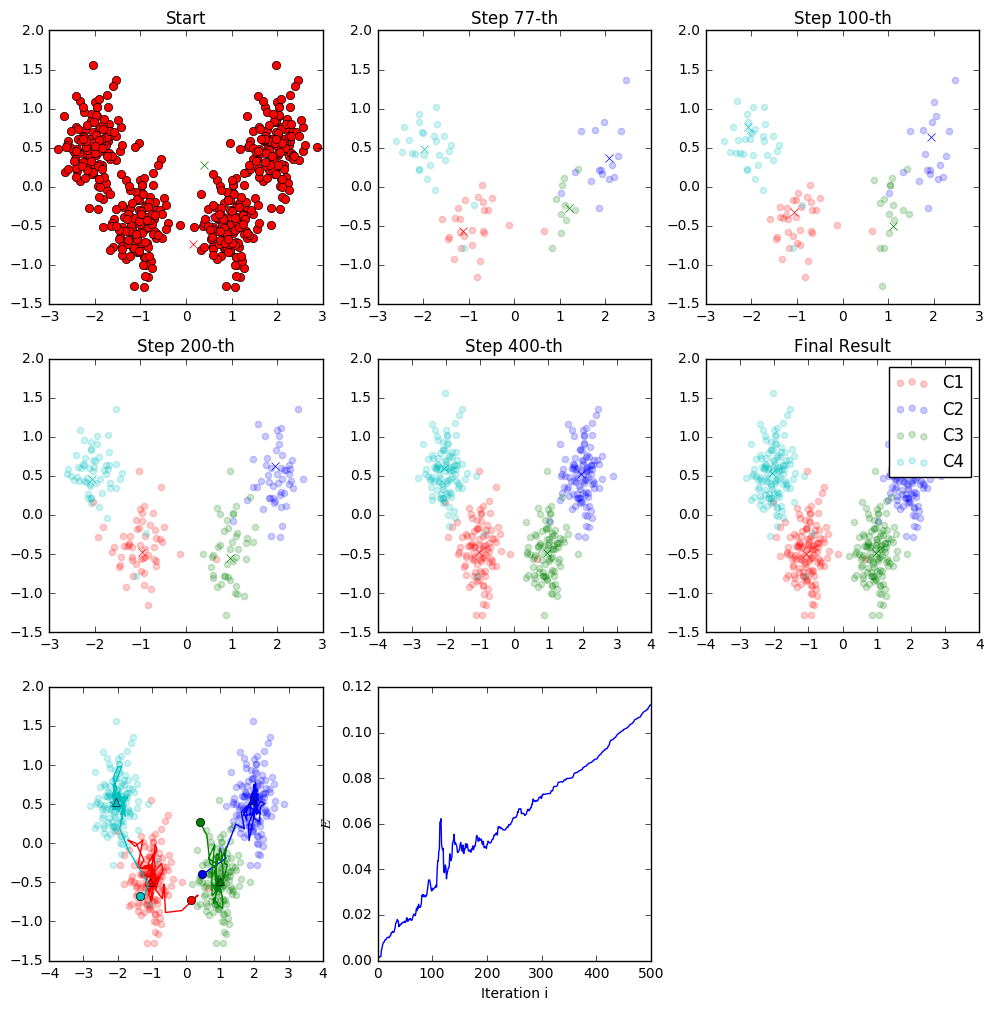

In [261]:
def online_kmean(k=4, t_max = CLUSTER_DATA.shape[0], eta=0.4, tau=0.99):
    cost = []
    means = np.mean(CLUSTER_DATA, axis=0)
    centroids = np.random.multivariate_normal(means, np.eye(2),k) # k x 2
    
    plt.figure(figsize=(12,12))
    count = 1
    plt.subplot(3,3, count)
    count += 1
    for c in range(len(centroids)):
        plt.plot(centroids[c,0], centroids[c,1], marker='x', color = COLORS[c])
    plt.plot(CLUSTER_DATA[:, 0], CLUSTER_DATA[:,1], 'ro')
    plt.title("Start")
    plt.legend()
    
    points_in_centroid = [ list() for i in range(k) ]

    movements = [ [np.copy(centroids[i])] for i in range(k) ]
    
    for i in range(t_max):

        p = CLUSTER_DATA[i,:]
        distance = np.sum(np.power(centroids - p, 2), axis=1)
        closest_centroid = np.argmin(distance)
        points_in_centroid[closest_centroid].append(i)

        delta = centroids[closest_centroid] - p

        centroids[closest_centroid] -= eta*delta
        
        movements[closest_centroid].append(np.copy(centroids[closest_centroid]))
        
        if i > int(t_max / 4.0):
            eta = tau*eta
            
        if i in [77,100,200,400]:
            plt.subplot(3,3,count)
            for c in range(len(points_in_centroid)):
                points = points_in_centroid[c]
                plt.plot(centroids[c,0], centroids[c,1], marker='x', color = COLORS[c])

                plt.scatter(CLUSTER_DATA[points,0], CLUSTER_DATA[points,1], marker='o', color= COLORS[c], label = 'C%d' % (c+1), alpha = 0.2 )
            plt.title('Step %d-th' % (i))
            count = count + 1
        cluster_cost = [0]*k
        for c in range(k):
            points = points_in_centroid[c]
            if len(points) == 0:
                pass
            else:
                cluster_cost[c] =  np.sum(np.sum(np.power(CLUSTER_DATA[points] - centroids[c,:],2), axis=1))
        
        cost.append(np.sum(cluster_cost)/(2.0*CLUSTER_DATA.shape[0]))
      
    plt.subplot(3,3, count)
    for c in range(len(points_in_centroid)):
        points = points_in_centroid[c]
        plt.plot(centroids[c,0], centroids[c,1], marker='x', color = COLORS[c])

        plt.scatter(CLUSTER_DATA[points,0], CLUSTER_DATA[points,1], marker='o', color= COLORS[c], label = 'C%d' % (c+1), alpha=0.2 )
    plt.legend()
    plt.title('Final Result')
    count = count + 1
    
    plt.subplot(3,3, count)
    for c in range(k):
        trajectory = np.array(movements[c])
        plt.plot(trajectory[:,0], trajectory[:,1], color= COLORS[c])
        
        plt.plot(trajectory[0,0], trajectory[0,1], color= COLORS[c], marker='o')
        plt.plot(trajectory[-1,0], trajectory[-1,1], color= COLORS[c], marker='^')
        
        points = points_in_centroid[c]
        plt.plot(centroids[c,0], centroids[c,1], marker='x', color = COLORS[c])

        plt.scatter(CLUSTER_DATA[points,0], CLUSTER_DATA[points,1], marker='o', color= COLORS[c], label = 'C%d' % (c+1), alpha=0.2 )
    count = count + 1
    
    plt.subplot(3,3, count)
    plt.plot(cost)
    plt.ylabel("$E$")
    plt.xlabel("Iteration i")
online_kmean(k=4)